In [4]:
import tensorflow as tf 
from tensorflow.keras import layers, datasets, models 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 


In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

In [7]:
train_images.max(), test_images.min()

(255, 0)

In [8]:
train_images = train_images/255.0
test_images = test_images/255.0

In [9]:
train_images.min(), train_images.max()

(0.0, 1.0)

In [14]:
train_images.shape

(60000, 28, 28)

In [11]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [12]:
train_labels_cat = tf.keras.utils.to_categorical(train_labels)
test_labels_cat = tf.keras.utils.to_categorical(test_labels)

In [13]:
train_labels_cat

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
model = models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

tf.keras.losses.

history = model.fit(train_images, train_labels_cat, epochs=10, validation_data=(test_images, test_labels_cat))

2023-06-05 09:26:45.143133: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
1875/1875 [==============================] - ETA: 0s - loss: 0.4942 - accuracy: 0.8226

2023-06-05 09:28:02.602711: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 [==============================] - 67s 11ms/step - loss: 0.4942 - accuracy: 0.8226 - val_loss: 0.4246 - val_accuracy: 0.8467
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3738 - accuracy: 0.8622 - val_loss: 0.3973 - val_accuracy: 0.8577
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3397 - accuracy: 0.8738 - val_loss: 0.3673 - val_accuracy: 0.8654
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3153 - accuracy: 0.8826 - val_loss: 0.3651 - val_accuracy: 0.8688
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2983 - accuracy: 0.8896 - val_loss: 0.3868 - val_accuracy: 0.8626
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2870 - accuracy: 0.8922 - val_loss: 0.3467 - val_accuracy: 0.8749
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2757 - accuracy: 0.8967 - val_loss: 0.3465 - val_accura

In [16]:
model.evaluate(test_images, test_labels_cat)

2023-06-05 09:31:29.436131: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 3s 8ms/step - loss: 0.3401 - accuracy: 0.8835


[0.340104877948761, 0.8834999799728394]

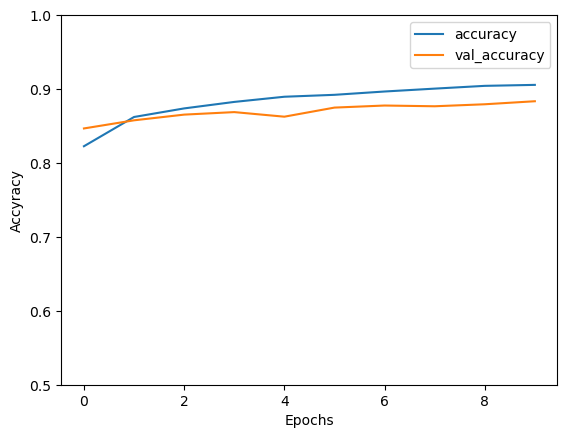

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accyracy')
plt.ylim([0.5, 1])
plt.legend(loc='best')

In [18]:
predictions = model.predict(test_images)

2023-06-05 09:36:08.208480: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 3s 8ms/step


In [19]:
predictions[0]

array([1.4482983e-06, 9.2687816e-07, 4.0690102e-06, 3.9475017e-07,
       2.2543770e-07, 3.4117627e-01, 1.4248516e-05, 4.2144875e-03,
       1.3354635e-06, 6.5458661e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9